In [29]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from scipy.fft import fft2, ifft2
from matplotlib.colors import LogNorm


1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

Global Minimum Point: [0. 0.]
Function Value at Global Minimum: 0.0


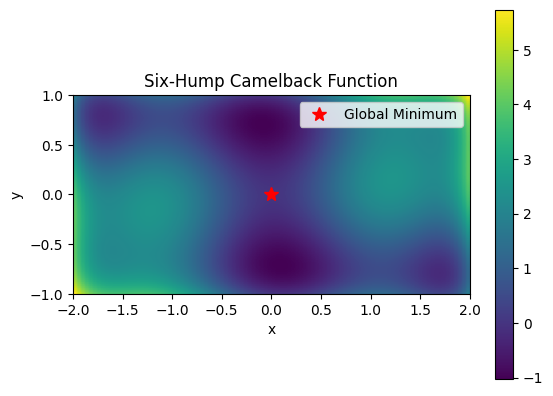

In [30]:
# Define the six-hump camelback function
def six_hump_camelback(x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4) / 3.) * x[0]**2 + x[0] * x[1] + (4 * x[1]**2 - 4) * x[1]**2

# Set bounds for x and y
bounds = [(-2, 2), (-1, 1)]

# Find global minimum using scipy.optimize.minimize
result = minimize(six_hump_camelback, x0=(0, 0), bounds=bounds)

print("Global Minimum Point:", result.x)
print("Function Value at Global Minimum:", result.fun)

# meshgrid 
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = six_hump_camelback([X, Y])

plt.figure()
plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower')
plt.colorbar()
plt.plot(result.x[0], result.x[1], 'r*', markersize=10, label='Global Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Six-Hump Camelback Function')
plt.legend()
plt.show()


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

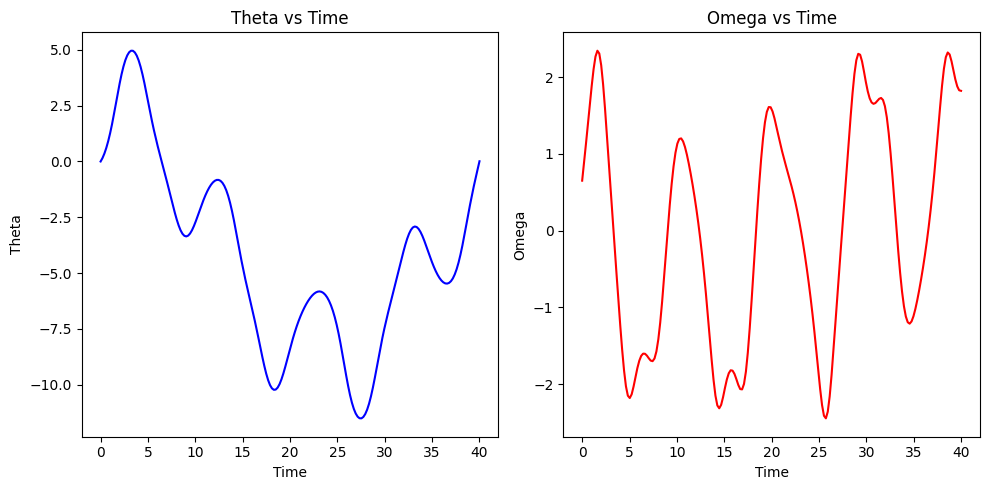

In [31]:
# Define the function representing the coupled ODEs
def pendulum_eq(y, t, Q, g, l, d, Omega):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = (-1 / Q) * omega + (g / l) * np.sin(theta) + d * np.cos(Omega * t)
    return [dtheta_dt, domega_dt]

# Parameters
l = 10.0
Q = 2.0
d = 1.5
Omega = 0.65

# Initial conditions
theta_0 = 0.0
omega_0 = 0.65
y0 = [theta_0, omega_0]

# Time points
t = np.linspace(0, 40, 200)  # Time span from 0 to 40 with 200 steps

# Solve the ODE
sol = odeint(pendulum_eq, y0, t, args=(Q, 9.81, l, d, Omega))

# Extracting solutions
theta = sol[:, 0]
omega = sol[:, 1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, theta, 'b', label='Theta')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Theta vs Time')

plt.subplot(1, 2, 2)
plt.plot(t, omega, 'r', label='Omega')
plt.xlabel('Time')
plt.ylabel('Omega')
plt.title('Omega vs Time')

plt.tight_layout()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

    year     hare     lynx  carrot
0   1900  30000.0   4000.0   48300
1   1901  47200.0   6100.0   48200
2   1902  70200.0   9800.0   41500
3   1903  77400.0  35200.0   38200
4   1904  36300.0  59400.0   40600
5   1905  20600.0  41700.0   39800
6   1906  18100.0  19000.0   38600
7   1907  21400.0  13000.0   42300
8   1908  22000.0   8300.0   44500
9   1909  25400.0   9100.0   42100
10  1910  27100.0   7400.0   46000
11  1911  40300.0   8000.0   46800
12  1912  57000.0  12300.0   43800
13  1913  76600.0  19500.0   40900
14  1914  52300.0  45700.0   39400
15  1915  19500.0  51100.0   39000
16  1916  11200.0  29700.0   36700
17  1917   7600.0  15800.0   41800
18  1918  14600.0   9700.0   43300
19  1919  16200.0  10100.0   41300
20  1920  24700.0   8600.0   47300
Period of Hares: 10.5
Period of Lynxes: 10.5


/var/folders/kj/msk__7492g13wstcypg71qf00000gn/T/ipykernel_61619/1159039663.py:36: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, hares_mag, 'g', markerfmt=" ", basefmt="-g")
/var/folders/kj/msk__7492g13wstcypg71qf00000gn/T/ipykernel_61619/1159039663.py:42: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freqs, lynxes_mag, 'm', markerfmt=" ", basefmt="-m")


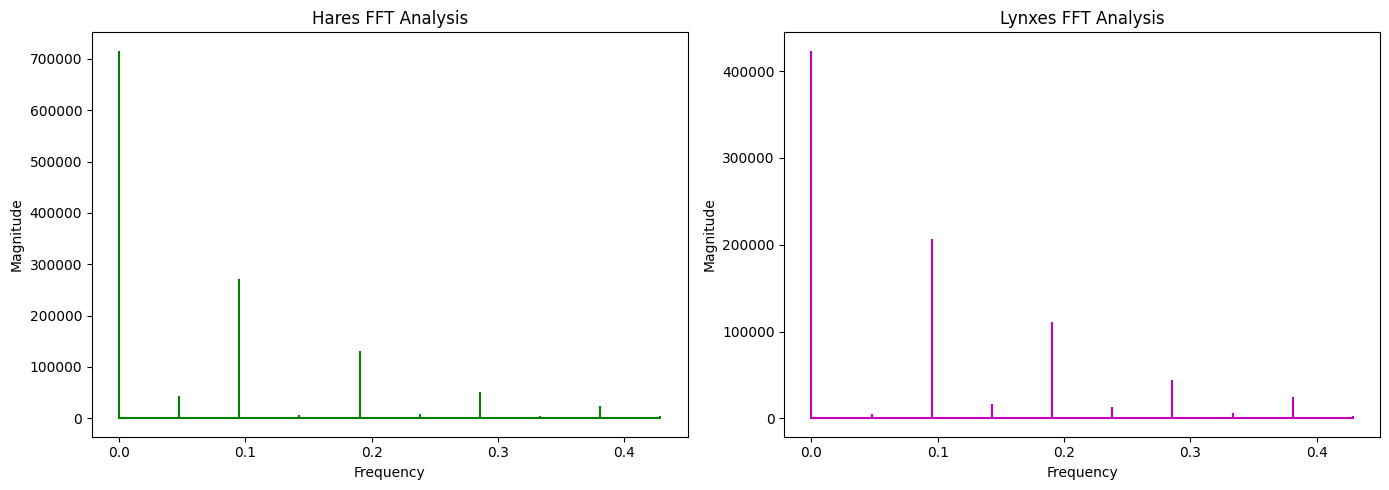

In [39]:
url = 'https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt?dl=1'  

df = pd.read_csv(url, delim_whitespace=True, comment='#', header=None) 
df.columns = ['year', 'hare', 'lynx', 'carrot']
print(df)


def read_custom_data(url):
    df = pd.read_csv(url, delim_whitespace=True, comment='#', header=None)
    df.columns = ['year', 'hares', 'lynxes', 'carrots']  # Anonymized column names
    return df

def perform_fft_analysis(data):
    hares_fft = np.fft.fft(data['hares'])
    lynxes_fft = np.fft.fft(data['lynxes'])
    freqs = np.fft.fftfreq(data['year'].size, data['year'][1] - data['year'][0])

    hares_magnitude = np.abs(hares_fft)
    lynxes_magnitude = np.abs(lynxes_fft)
    half_size = data['year'].size // 2
    freqs = freqs[:half_size]
    hares_magnitude = hares_magnitude[:half_size]
    lynxes_magnitude = lynxes_magnitude[:half_size]

    hares_peak_freq = freqs[np.argmax(hares_magnitude[1:]) + 1]
    lynxes_peak_freq = freqs[np.argmax(lynxes_magnitude[1:]) + 1]
    hares_period = 1 / hares_peak_freq
    lynxes_period = 1 / lynxes_peak_freq

    return freqs, hares_magnitude, lynxes_magnitude, hares_period, lynxes_period

def plot_analysis(freqs, hares_mag, lynxes_mag):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.stem(freqs, hares_mag, 'g', markerfmt=" ", basefmt="-g")
    plt.title('Hares FFT Analysis')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')

    plt.subplot(1, 2, 2)
    plt.stem(freqs, lynxes_mag, 'm', markerfmt=" ", basefmt="-m")
    plt.title('Lynxes FFT Analysis')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

# Reading data
data = read_custom_data(url)

# Performing FFT analysis
freq, hares_mag, lynxes_mag, hares_period, lynxes_period = perform_fft_analysis(data)

# Displaying results
print(f"Period of Hares: {hares_period}")
print(f"Period of Lynxes: {lynxes_period}")

# Plotting
plot_analysis(freq, hares_mag, lynxes_mag)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

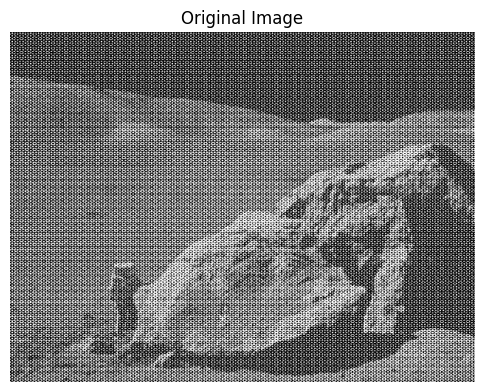

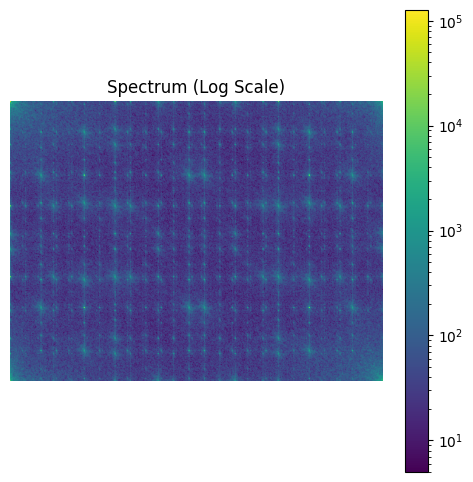

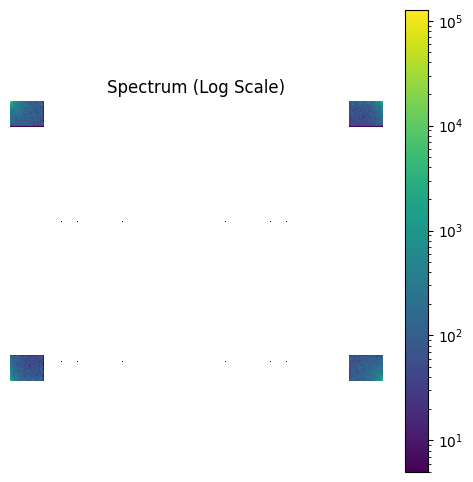

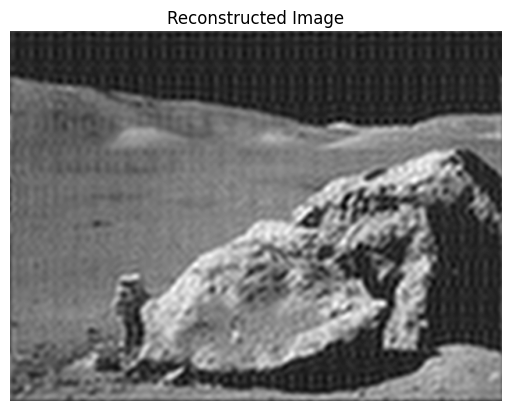

In [33]:
def plot_original_image(img):
    plt.figure(figsize=(6, 6))
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')


def plot_spectrum(fft_img):
    plt.figure(figsize=(6, 6))
    plt.title('Spectrum (Log Scale)')
    plt.imshow(np.abs(fft_img), norm=LogNorm(vmin=5))
    plt.colorbar()
    plt.axis('off')


def plot_filtered_img(filtered_img):
    plt.figure(figsize=(6, 6))
    plt.title('Filtered Image')
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')


def filter_img_with_fft(fft_img):
    keep_fraction = 0.09
    im_fft2 = fft_image.copy()

    # Set r and c to be the number of rows and columns of the array.
    r, c = im_fft2.shape

    # Set to zero all rows with indices between r*keep_fraction and
    # r*(1-keep_fraction):
    im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

    # Similarly with the columns:
    im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
    return im_fft2

def reconstruct_img(new_img):
    im_new = ifft2(new_img).real
    plt.figure()
    plt.imshow(im_new, plt.cm.gray)
    plt.title('Reconstructed Image')
    plt.axis('off')

image = plt.imread("images/moonlanding.png")
fft_image = fft2(image)
plot_original_image(image)
plot_spectrum(fft_image)

copy_fft = filter_img_with_fft(fft_image)

plot_spectrum(copy_fft)

reconstruct_img(copy_fft)
plt.show()